In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1) Apply ML Classification techniques on "Social_Network_Ads.csv" dataset.

In [2]:
sns.set(rc={"figure.figsize":[10,10]})

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

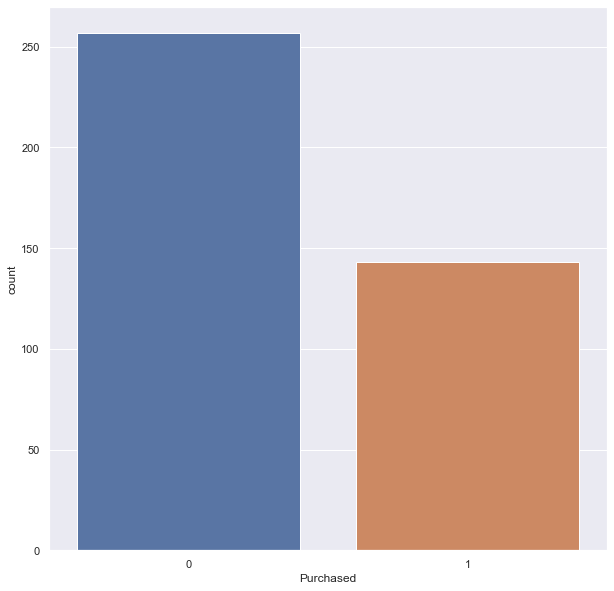

In [19]:
sns.countplot(df['Purchased'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

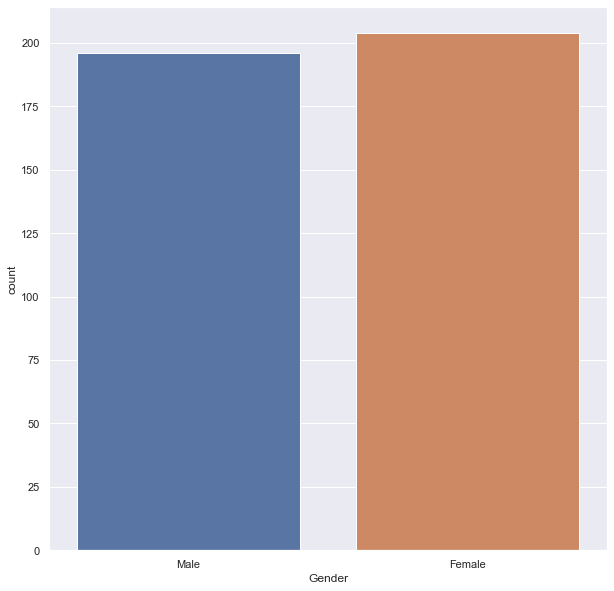

In [20]:
sns.countplot(df['Gender'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

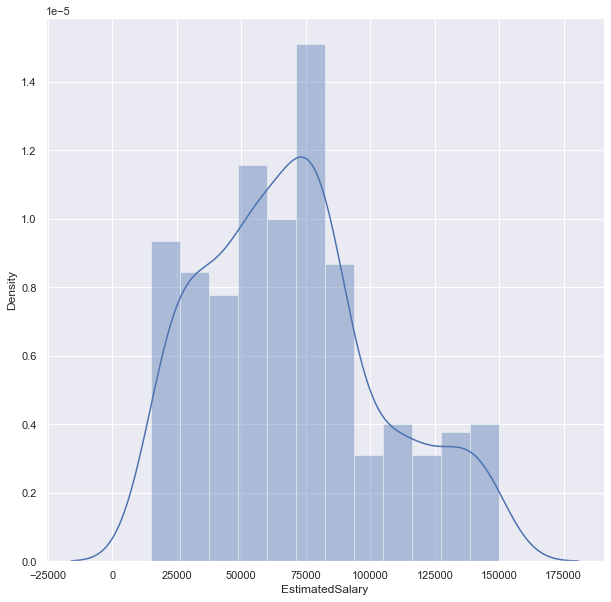

In [21]:
sns.distplot(df['EstimatedSalary'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

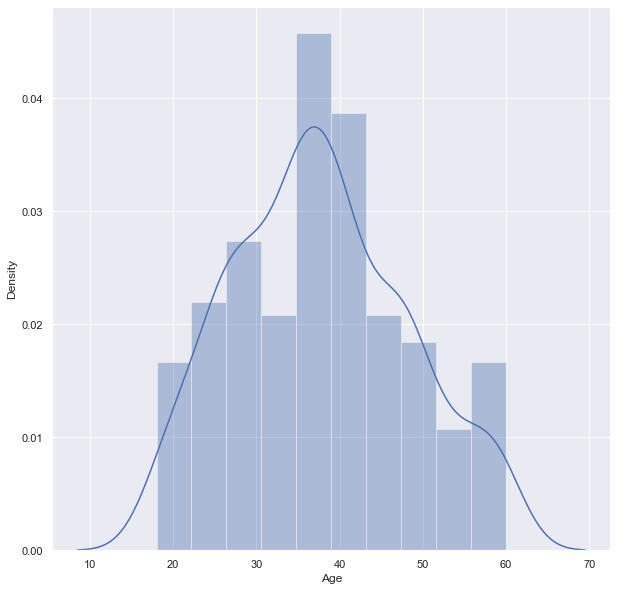

In [22]:
sns.distplot(df['Age'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

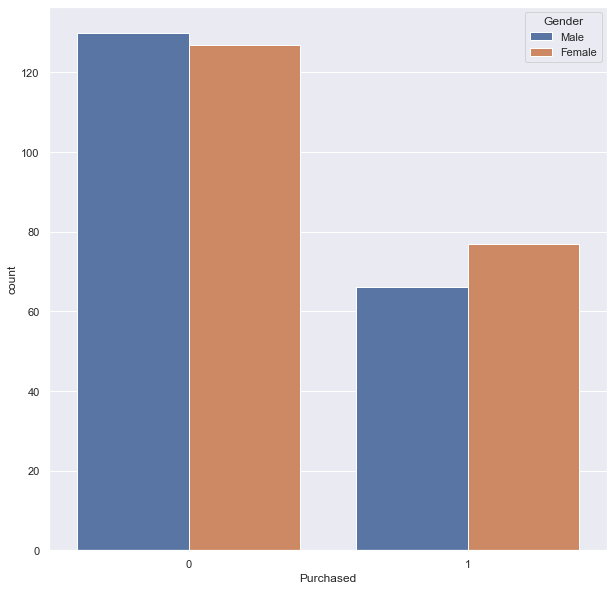

In [23]:
sns.countplot(df['Purchased'],hue=df['Gender'])

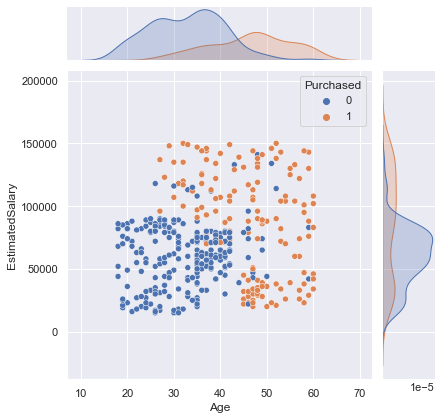

In [27]:
sns.jointplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df)

<AxesSubplot:>

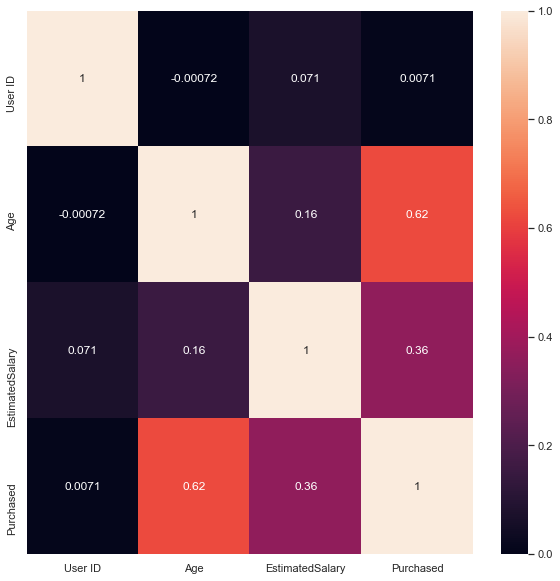

In [24]:
sns.heatmap(df.corr(),annot=True)

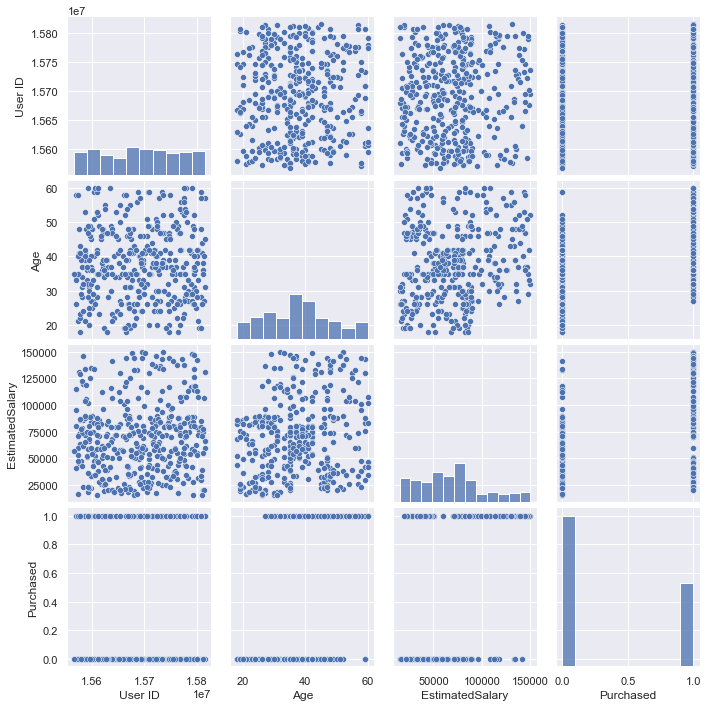

In [26]:
sns.pairplot(df)

In [28]:
df.drop('User ID',axis=1,inplace=True)

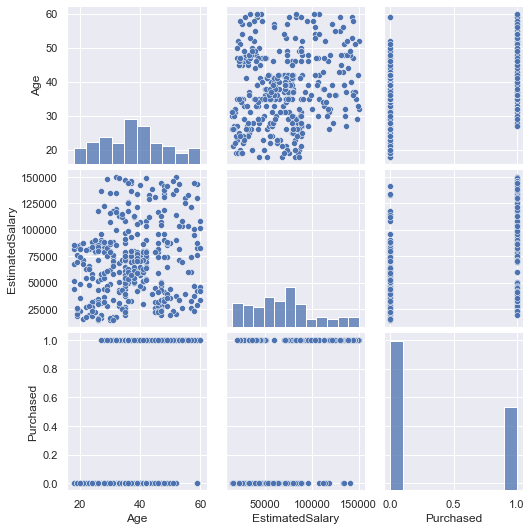

In [30]:
sns.pairplot(df)

In [35]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [36]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [37]:
from imblearn.over_sampling import SMOTE
x,y =SMOTE().fit_resample(x,y)

In [38]:
y.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [42]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [46]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('_'*30)

using: LR
train accuarcy:0.8369829683698297
test accuarcy:0.7766990291262136
recall: 0.803921568627451
precision: 0.7592592592592593
f1score: 0.780952380952381
fbeta: 0.7677902621722846
______________________________
using: KNN
train accuarcy:0.9197080291970803
test accuarcy:0.9029126213592233
recall: 0.9803921568627451
precision: 0.847457627118644
f1score: 0.909090909090909
fbeta: 0.8710801393728222
______________________________
using: DT
train accuarcy:0.9975669099756691
test accuarcy:0.8640776699029126
recall: 0.9411764705882353
precision: 0.8135593220338984
f1score: 0.8727272727272728
fbeta: 0.8362369337979093
______________________________
using: SVC
train accuarcy:0.9221411192214112
test accuarcy:0.9029126213592233
recall: 0.9215686274509803
precision: 0.8867924528301887
f1score: 0.9038461538461539
fbeta: 0.893536121673004
______________________________
using: RF
train accuarcy:0.9975669099756691
test accuarcy:0.8932038834951457
recall: 0.9215686274509803
precision: 0.8703703703

C:\Users\mega\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:0.9927007299270073
test accuarcy:0.9029126213592233
recall: 0.9411764705882353
precision: 0.8727272727272727
f1score: 0.9056603773584905
fbeta: 0.8856088560885608
______________________________
using: NB
train accuarcy:0.8953771289537713
test accuarcy:0.8543689320388349
recall: 0.8823529411764706
precision: 0.8333333333333334
f1score: 0.8571428571428571
fbeta: 0.8426966292134833
______________________________


In [47]:
model=XGBClassifier()
model.fit(x_train,y_train)

[02:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mega\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 2) Apply ML Classification techniques on "Titanic.csv" dataset.

In [3]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
              ..
E49            1
E58            1
D6             1
C106           1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [8]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
cols=['Age','Cabin','Embarked']
for col in cols:
    df[col]=imputer.fit_transform(df[[col]])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df['Ticket'].value_counts()

1601                7
CA. 2343            7
347082              7
347088              6
3101295             6
                   ..
SOTON/O2 3101287    1
350029              1
362316              1
4138                1
2669                1
Name: Ticket, Length: 681, dtype: int64

In [12]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
def get_title(x):
    if 'Mrs' in x:
        return 'Mrs'
    elif 'Miss' in x:
        return 'Miss'
    elif 'Mr' in x:
        return 'Mr'
    else:
        return 'undefined'
df['title']=df['Name'].apply(get_title)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,undefined
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

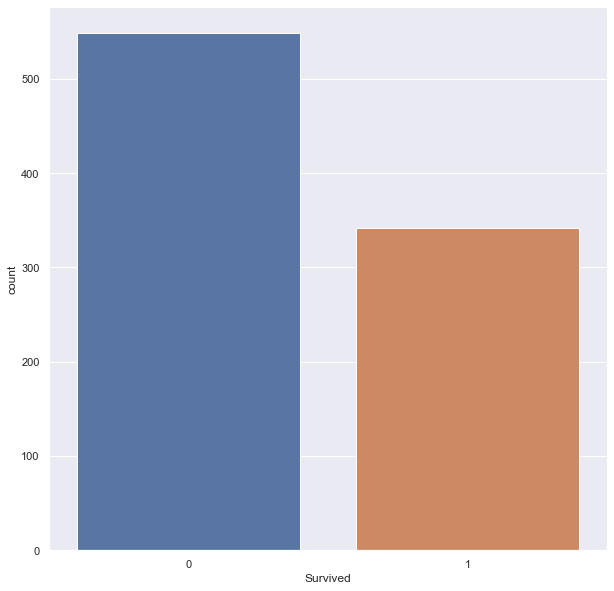

In [18]:
sns.countplot(df['Survived'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

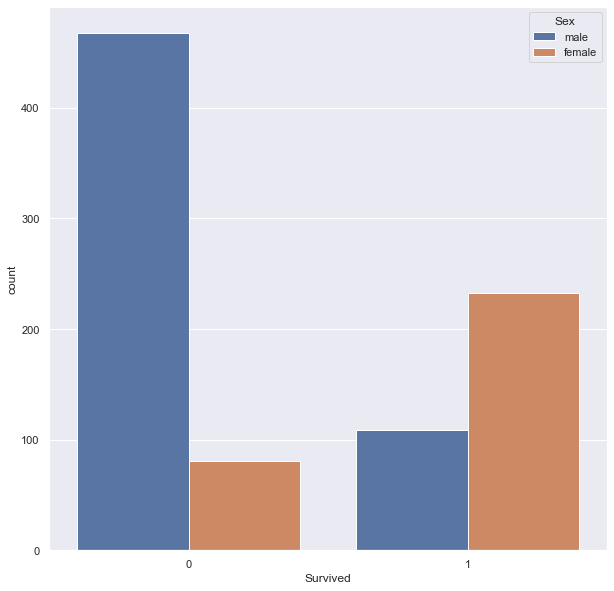

In [19]:
sns.countplot(df['Survived'],hue=df['Sex'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

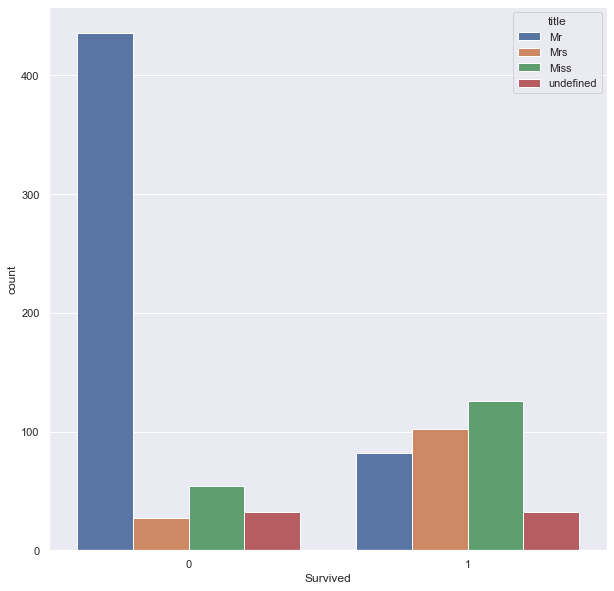

In [20]:
sns.countplot(df['Survived'],hue=df['title'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

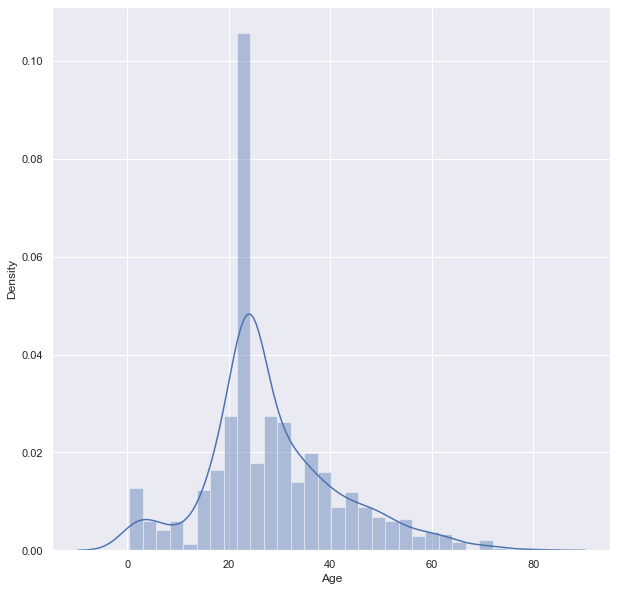

In [21]:
sns.distplot(df['Age'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

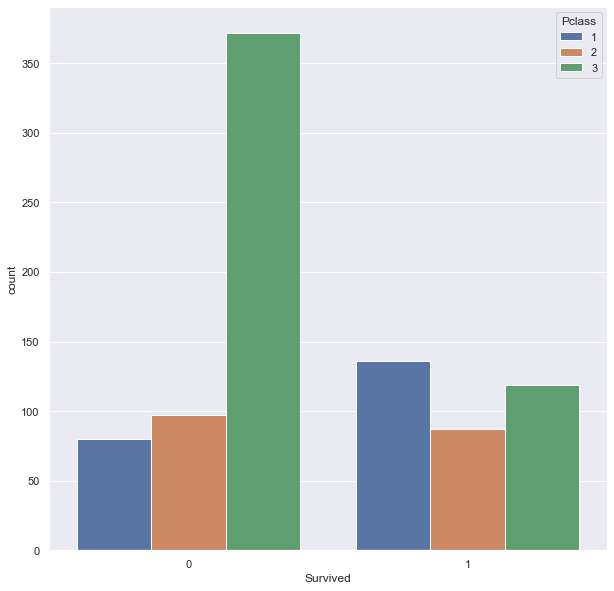

In [22]:
sns.countplot(df['Survived'],hue=df['Pclass'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

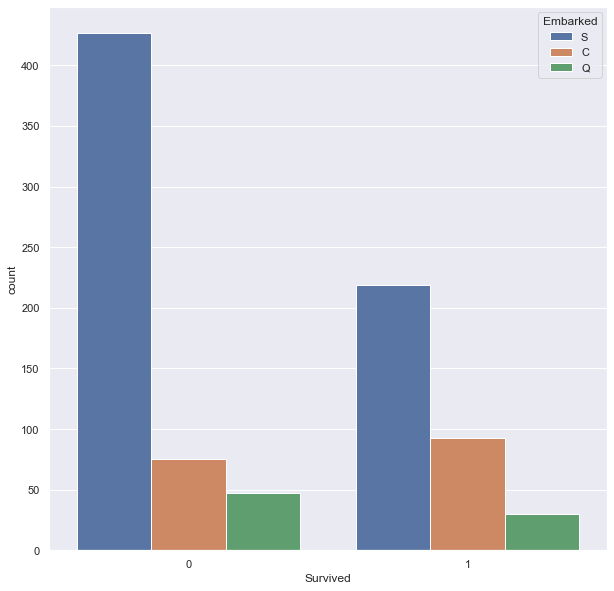

In [23]:
sns.countplot(df['Survived'],hue=df['Embarked'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

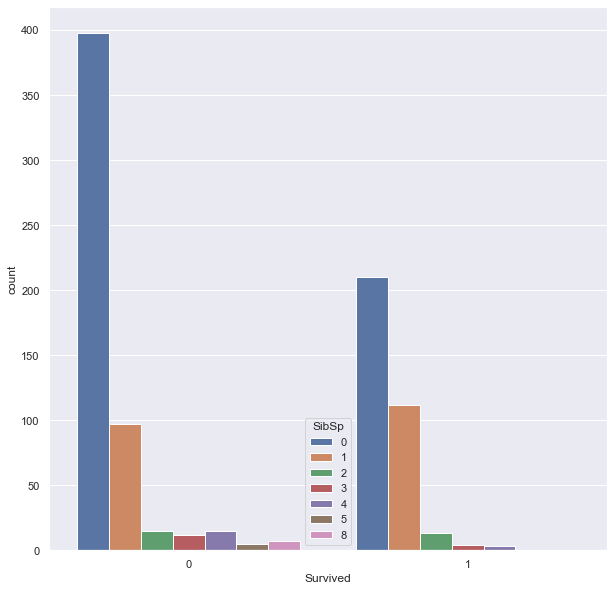

In [24]:
sns.countplot(df['Survived'],hue=df['SibSp'])

C:\Users\mega\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

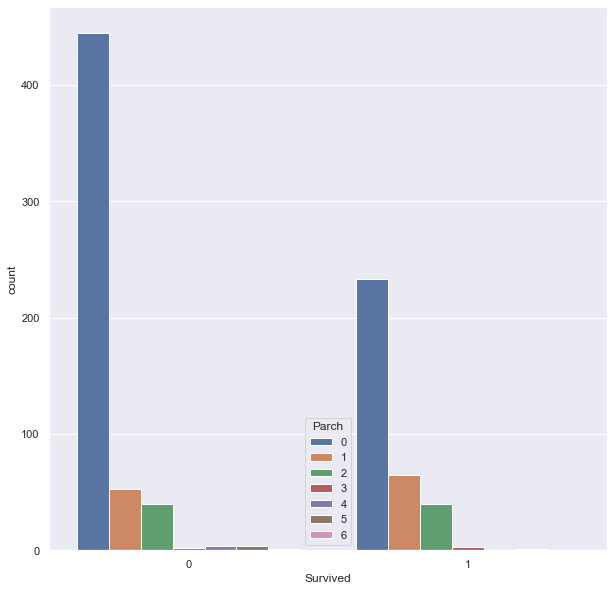

In [25]:
sns.countplot(df['Survived'],hue=df['Parch'])

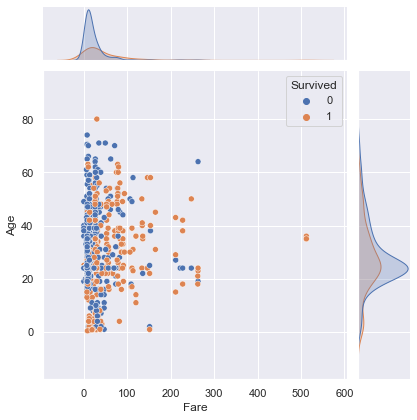

In [26]:
sns.jointplot(x='Fare',y='Age',data=df,hue='Survived')

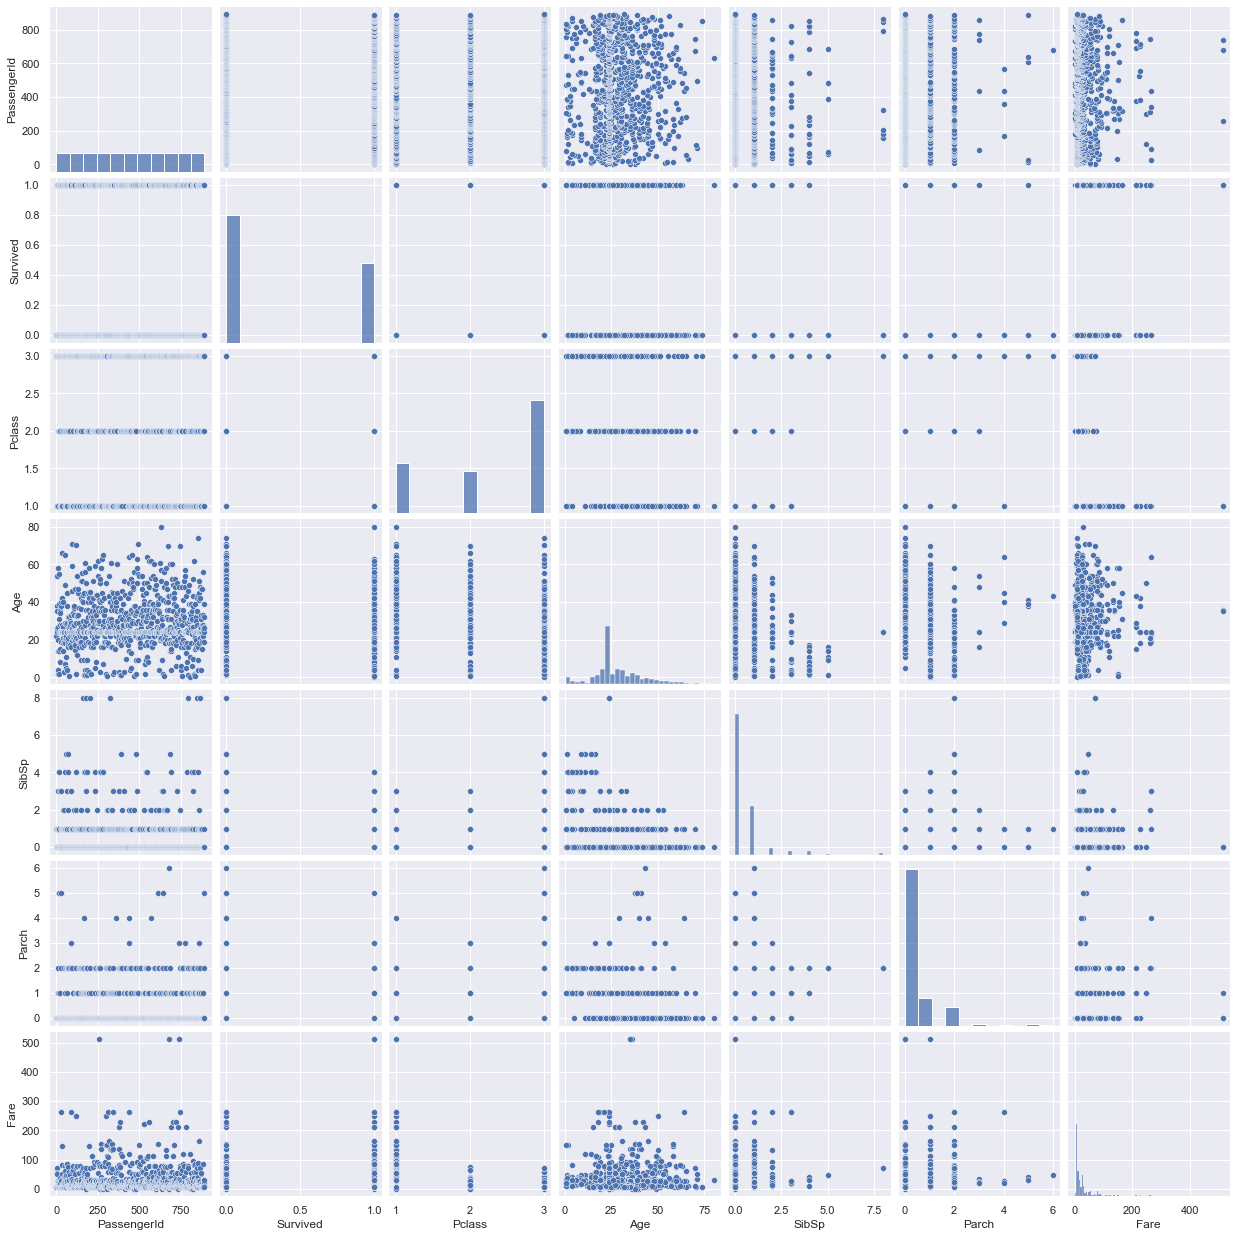

In [27]:
sns.pairplot(df)

In [28]:
df.drop(['PassengerId','SibSp','Parch','Ticket','Name'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title
0,0,3,male,22.0,7.2500,B96 B98,S,Mr
1,1,1,female,38.0,71.2833,C85,C,Mrs
2,1,3,female,26.0,7.9250,B96 B98,S,Miss
3,1,1,female,35.0,53.1000,C123,S,Mrs
4,0,3,male,35.0,8.0500,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,B96 B98,S,undefined
887,1,1,female,19.0,30.0000,B42,S,Miss
888,0,3,female,24.0,23.4500,B96 B98,S,Miss
889,1,1,male,26.0,30.0000,C148,C,Mr


In [29]:
df=pd.get_dummies(columns=['Sex','title','Cabin','Pclass'],drop_first=True,data=df)
df

,Survived,Age,Fare,Embarked,Sex_male,title_Mr,title_Mrs,title_undefined,Cabin_A14,Cabin_A16,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_2,Pclass_3
0,0,22.0,7.2500,S,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,S,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,S,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,S,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
887,1,19.0,30.0000,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,24.0,23.4500,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,26.0,30.0000,C,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df=pd.get_dummies(columns=['Embarked'],drop_first=True,data=df)


In [53]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [49]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
x

,Age,Fare,Sex_male,title_Mr,title_Mrs,title_undefined,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,7.2500,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38.0,71.2833,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,35.0,53.1000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,19.0,30.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,24.0,23.4500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
889,26.0,30.0000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=22)
x,y= sm.fit_resample(x,y)

In [57]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=22 ,stratify=y)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [59]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [61]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print('_'*30)

using: LR


C:\Users\mega\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuarcy:0.8223234624145785
test accuarcy:0.8363636363636363
recall: 0.8272727272727273
precision: 0.8425925925925926
f1score: 0.834862385321101
fbeta: 0.8394833948339483
______________________________
using: KNN
train accuarcy:0.816628701594533
test accuarcy:0.7727272727272727
recall: 0.7727272727272727
precision: 0.7727272727272727
f1score: 0.7727272727272727
fbeta: 0.7727272727272727
______________________________
using: DT
train accuarcy:0.9886104783599089
test accuarcy:0.8090909090909091
recall: 0.8181818181818182
precision: 0.8035714285714286
f1score: 0.8108108108108109
fbeta: 0.806451612903226
______________________________
using: SVC
train accuarcy:0.6446469248291572
test accuarcy:0.6727272727272727
recall: 0.5363636363636364
precision: 0.7375
f1score: 0.6210526315789474
fbeta: 0.686046511627907
______________________________
using: RF
train accuarcy:0.9886104783599089
test accuarcy:0.8590909090909091
recall: 0.8272727272727273
precision: 0.883495145631068
f1score: 0.8544

C:\Users\mega\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuarcy:0.9829157175398633
test accuarcy:0.8272727272727273
recall: 0.8454545454545455
precision: 0.8157894736842105
f1score: 0.8303571428571429
fbeta: 0.8215547703180212
______________________________
using: NB
train accuarcy:0.60250569476082
test accuarcy:0.5318181818181819
recall: 0.08181818181818182
precision: 0.8181818181818182
f1score: 0.1487603305785124
fbeta: 0.2922077922077922
______________________________


In [62]:
model=RandomForestClassifier(n_estimators=60)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60)